In [1]:
import numpy as np
import pandas
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import os

In [2]:
emotions = ['happy', 'sad', 'angry', 'chill', 'dreamy', 'lovey-dovey', 'epic', 'anxious', 'pump-up', 'sexy']
path = './dataset.csv'

client_id = '2d0aef4304064e67bdce269495c514ba'
client_secret = 'b0b2829b32cd4963a5de4c35528faf1d'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

def create_initial_dataset(emotions: list) -> pandas.DataFrame:
    
    search_results = []
    songs = []

    #collect 10 playlist IDs for each emotion
    for e in emotions:

        search_query = e
        result = sp.search(search_query, type='playlist')
        search_results.append(result)

    print('Playlists scraped successfully...')

    #collect audio features from every song the collected playlists are composed of
    for i in range(len(search_results)):
        print(emotions[i], ':')
        for j in search_results[i]['playlists']['items']:
            tracks = sp.playlist_items(j['id'])
            for k in tracks['items']:
                if (k['track'] != None and k['track']['id'] != None and k['track']['id'] != ''):
                    #details
                    uri = 'spotify:track:' + k['track']['id']
                    features = sp.audio_features(uri)
                    if (features[0] != None):
                        songs.append([emotions[i], k['track']['id'], features[0]['danceability'], features[0]['energy'], features[0]['key'], features[0]['loudness'], features[0]['mode'], features[0]['speechiness'], features[0]['acousticness'], features[0]['instrumentalness'], features[0]['valence'], features[0]['tempo']])
        print("Got 'em tracks!")
    
    #create dataframe and store information on a .csv document for quicker retrieval
    array = np.array(songs)
    df = pandas.DataFrame(array, columns=['emotion', 'song', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
    df.to_csv('./dataset.csv')
    print('Done!')
    return df

if not os.path.exists(path):
    df = create_initial_dataset(emotions)

else:
    df = pandas.read_csv(path)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000
mean,0.588771,0.538897,5.250180,-9.142582,0.632773,0.084023,0.363912,0.183046,0.409984,117.427531
std,0.169335,0.247475,3.612298,4.980055,0.482078,0.087173,0.341976,0.336447,0.237955,29.032848
min,0.000000,0.000289,0.000000,-37.865000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
25%,0.481000,0.349000,2.000000,-11.173750,0.000000,0.036500,0.042200,0.000000,0.214000,94.978500
50%,0.608000,0.547000,5.000000,-7.948500,1.000000,0.048500,0.244000,0.000028,0.382000,118.066500
75%,0.714000,0.741000,8.000000,-5.720000,1.000000,0.087575,0.694000,0.102750,0.582000,135.981750
max,0.980000,0.998000,11.000000,-0.198000,1.000000,0.811000,0.996000,0.996000,0.980000,220.099000


In [3]:
df.drop_duplicates(subset='song', inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,7599.000000,7599.000000,7599.00000,7599.000000,7599.000000,7599.000000,7599.000000,7599.000000,7599.000000,7599.000000
mean,0.585647,0.536511,5.24648,-9.302788,0.632846,0.083579,0.366803,0.197934,0.407559,117.383749
std,0.171685,0.249895,3.60543,5.093756,0.482061,0.087791,0.344271,0.346383,0.238734,29.120341
min,0.000000,0.000289,0.00000,-37.865000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
25%,0.477000,0.344000,2.00000,-11.394000,0.000000,0.036200,0.040800,0.000000,0.211000,94.869500
50%,0.605000,0.546000,5.00000,-8.065000,1.000000,0.047800,0.247000,0.000050,0.378000,118.068000
75%,0.712000,0.740000,8.00000,-5.791000,1.000000,0.085550,0.699000,0.188500,0.581000,135.981500
max,0.980000,0.998000,11.00000,-0.198000,1.000000,0.811000,0.996000,0.996000,0.980000,220.099000


In [4]:
df.head(len(df))

,emotion,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,happy,2U9ln4tEDs22K8NCSAitt1,0.739,0.900,0,-4.866,1,0.0463,0.001820,0.629000,0.474,126.999
1,happy,30oRPNefnSnXEBL2aOifIS,0.674,0.862,5,-6.431,0,0.0344,0.001230,0.064300,0.806,123.004
2,happy,2VveodsDiyIi3zcYMDgRx1,0.846,0.637,9,-7.388,0,0.0370,0.021900,0.000826,0.557,120.997
3,happy,08sfbGBXxJM7MIquO1lmAq,0.660,0.918,6,-4.321,1,0.0486,0.039700,0.000206,0.432,122.065
4,happy,0ynPUHpdm11TcLZrA0cUTO,0.612,0.883,0,-5.799,1,0.0370,0.001620,0.090400,0.393,120.980
...,...,...,...,...,...,...,...,...,...,...,...,...
7594,sexy,2vPTtiR7x7T6Lr17CE2FAE,0.412,0.441,11,-11.523,0,0.2910,0.029600,0.072600,0.174,185.571
7595,sexy,2G7V7zsVDxg1yRsu7Ew9RJ,0.835,0.626,1,-5.833,1,0.1250,0.058900,0.000060,0.350,91.030
7596,sexy,6HlE9t71z9DjGi7KqSyEpA,0.711,0.592,4,-7.136,0,0.2300,0.758000,0.000000,0.535,124.749
7597,sexy,2Sh4sAOfnSHEVKFyysxzat,0.694,0.810,11,-3.556,0,0.0661,0.122000,0.000000,0.824,137.968


In [5]:
def count_songs_for_emotion(df: pandas.DataFrame) -> list:
    
    counter = [0 for i in emotions]

    for j in range(len(df)):
        e = df.iloc[j]['emotion']
        for k in range(len(emotions)):
            if emotions[k] == e:
                counter[k] += 1
    return counter

counter = count_songs_for_emotion(df)

In [6]:
counter

[887, 760, 801, 910, 888, 697, 819, 499, 727, 611]

In [7]:
df_en_val = df[['emotion', 'song', 'energy', 'valence']]
df_en_val.head(1000)

,emotion,song,energy,valence
0,happy,2U9ln4tEDs22K8NCSAitt1,0.900,0.474
1,happy,30oRPNefnSnXEBL2aOifIS,0.862,0.806
2,happy,2VveodsDiyIi3zcYMDgRx1,0.637,0.557
3,happy,08sfbGBXxJM7MIquO1lmAq,0.918,0.432
4,happy,0ynPUHpdm11TcLZrA0cUTO,0.883,0.393
...,...,...,...,...
995,sad,6N22FZs2ZhPBYi3b9XPajV,0.630,0.313
996,sad,3afkJSKX0EAMsJXTZnDXXJ,0.537,0.250
997,sad,1v1oIWf2Xgh54kIWuKsDf6,0.302,0.123
998,sad,0Z5ok0QLLttAKsujOZYOXf,0.470,0.325


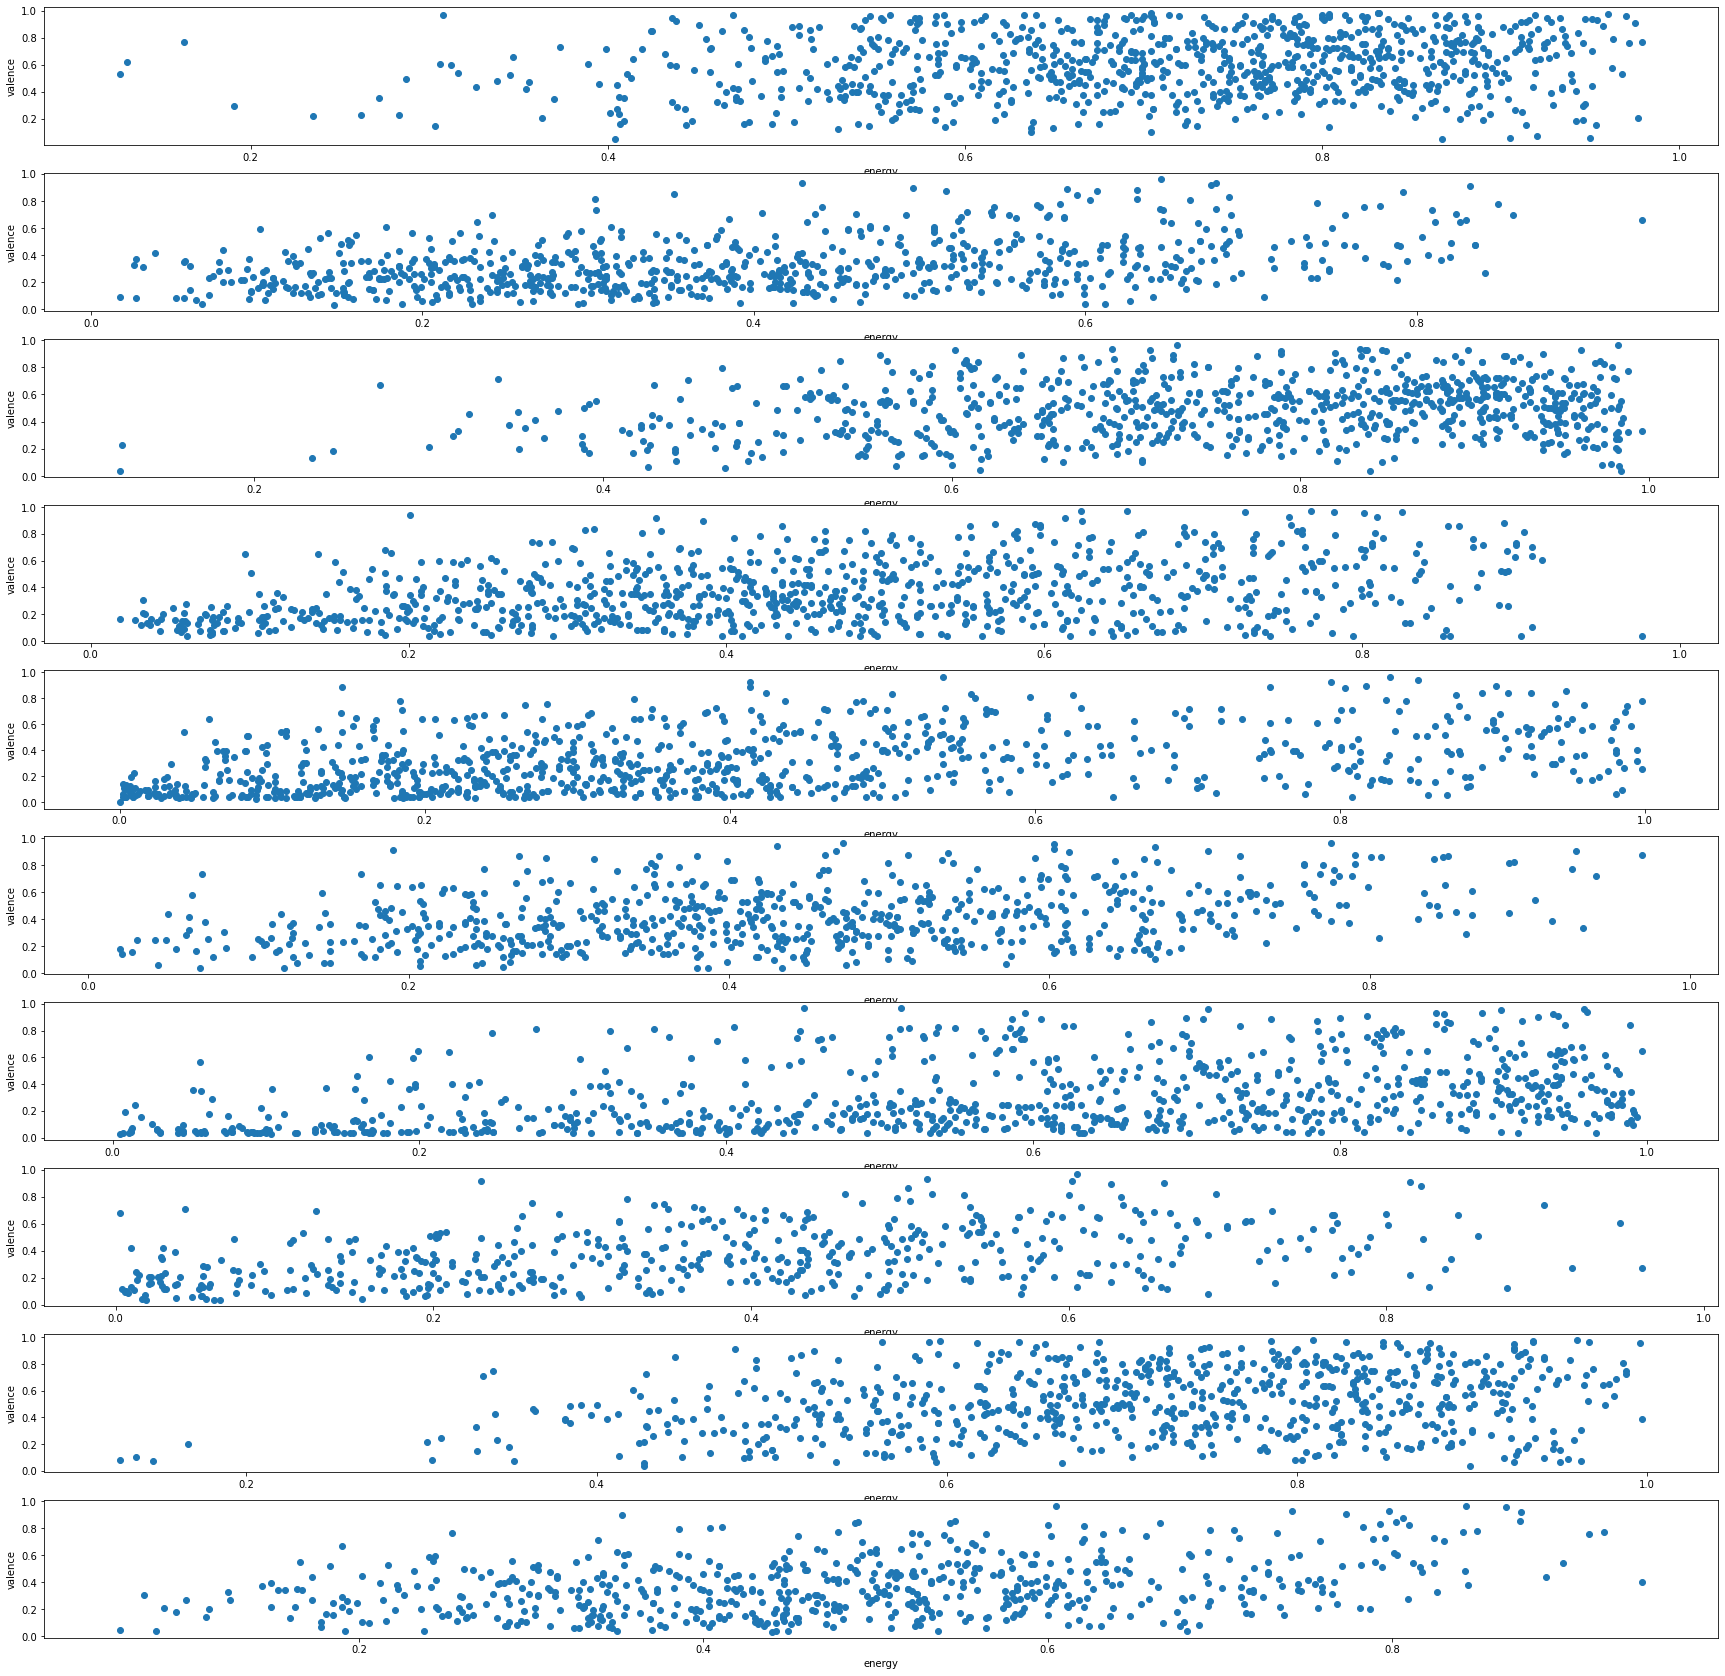

In [8]:
import matplotlib.pyplot as plt
#import sklearn.cluster as skc

#centroids = []

plt.figure(1, figsize=(30,30))

def draw_scatters(counter: list, df: pandas.DataFrame):
    
    curpos = 0
    cc = 1

    for c in counter:
        df_single_emotion = df[curpos:curpos + c]
        df_single_emotion = df_single_emotion[['energy', 'valence']].astype('float')
        
        curpos += c
        
        plt.subplot(10, 1, cc)
        plt.scatter([float(x) for x in df_single_emotion['energy']], [float (x) for x in df_single_emotion['valence']])
        plt.xlabel('energy')
        plt.ylabel('valence')
        
        cc += 1
        
draw_scatters(counter, df_en_val)

#m, a = df3['energy'].mean(), df3['valence'].mean()
#s1, s2 = df3['energy'].std(), df3['valence'].std()
#centroids.append((m, a, s1, s2))
##centroid = skc.KMeans(n_clusters=1, init='k-means++', random_state=0).fit(df3[['energy', 'valence']])
##centroids.append(centroid.cluster_centers_)

In [9]:
#outliers detection based on zscore on all features
from scipy import stats

#to check how many will be cut off
counter = count_songs_for_emotion(df)
print(counter)

df_no_id = df.loc[:, ['emotion', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']]
df_no_id.iloc[:, 1:11] = df_no_id.iloc[:, 1:11].astype('float')

#empty DataFrame, to be built with next for cycle
df_to_build = pandas.DataFrame()

#remove outliers based on z-score on every feature
curpos = 0
for c in counter:

    df_no_id_single_emotion = df_no_id.iloc[curpos:curpos+c, 1:11]
    z = np.abs(stats.zscore(df_no_id_single_emotion))

    threshold = 3

    df_no_id_single_emotion = df_no_id_single_emotion[(z < threshold).all(axis=1)]
    df_no_id_single_emotion = df_no_id_single_emotion.merge(df_no_id.iloc[curpos:curpos+c], on=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
    df_no_id_single_emotion.drop_duplicates(inplace=True)
    df_to_build = pandas.concat([df_to_build, df_no_id_single_emotion])

    curpos += c
    
counter = count_songs_for_emotion(df_to_build)
print(counter)

[887, 760, 801, 910, 888, 697, 819, 499, 727, 611]
[799, 695, 742, 874, 842, 656, 785, 475, 655, 587]


In [12]:
#outliers detection based on zscore on energy and valence

#to check how many will be cut off
counter = count_songs_for_emotion(df)
print(counter)

df_no_id_en_val = df.loc[:, ['emotion', 'energy', 'valence']]
df_no_id_en_val.iloc[:, 1:3] = df_no_id_en_val.iloc[:, 1:3].astype('float')

#empty DataFrame, to be built with next for cycle
df_to_build_en_val = pandas.DataFrame()

#remove outliers based on z-score on energy and valence features
curpos = 0
for c in counter:
    df_no_id_en_val_single_emotion = df_no_id_en_val.iloc[curpos:curpos+c, 1:3]
    z = np.abs(stats.zscore(df_no_id_en_val_single_emotion))

    threshold = 3

    df_no_id_en_val_single_emotion = df_no_id_en_val_single_emotion[(z < threshold).all(axis=1)]
    df_no_id_en_val_single_emotion = df_no_id_en_val_single_emotion.merge(df_no_id_en_val.iloc[curpos:curpos+c], on=['energy', 'valence'])
    df_no_id_en_val_single_emotion.drop_duplicates(inplace=True)
    df_to_build_en_val = pandas.concat([df_to_build_en_val, df_no_id_en_val_single_emotion])

    curpos += c
    
counter = count_songs_for_emotion(df_to_build_en_val)
print(counter)

[887, 760, 801, 910, 888, 697, 819, 499, 727, 611]
[873, 744, 791, 909, 886, 692, 818, 498, 718, 605]


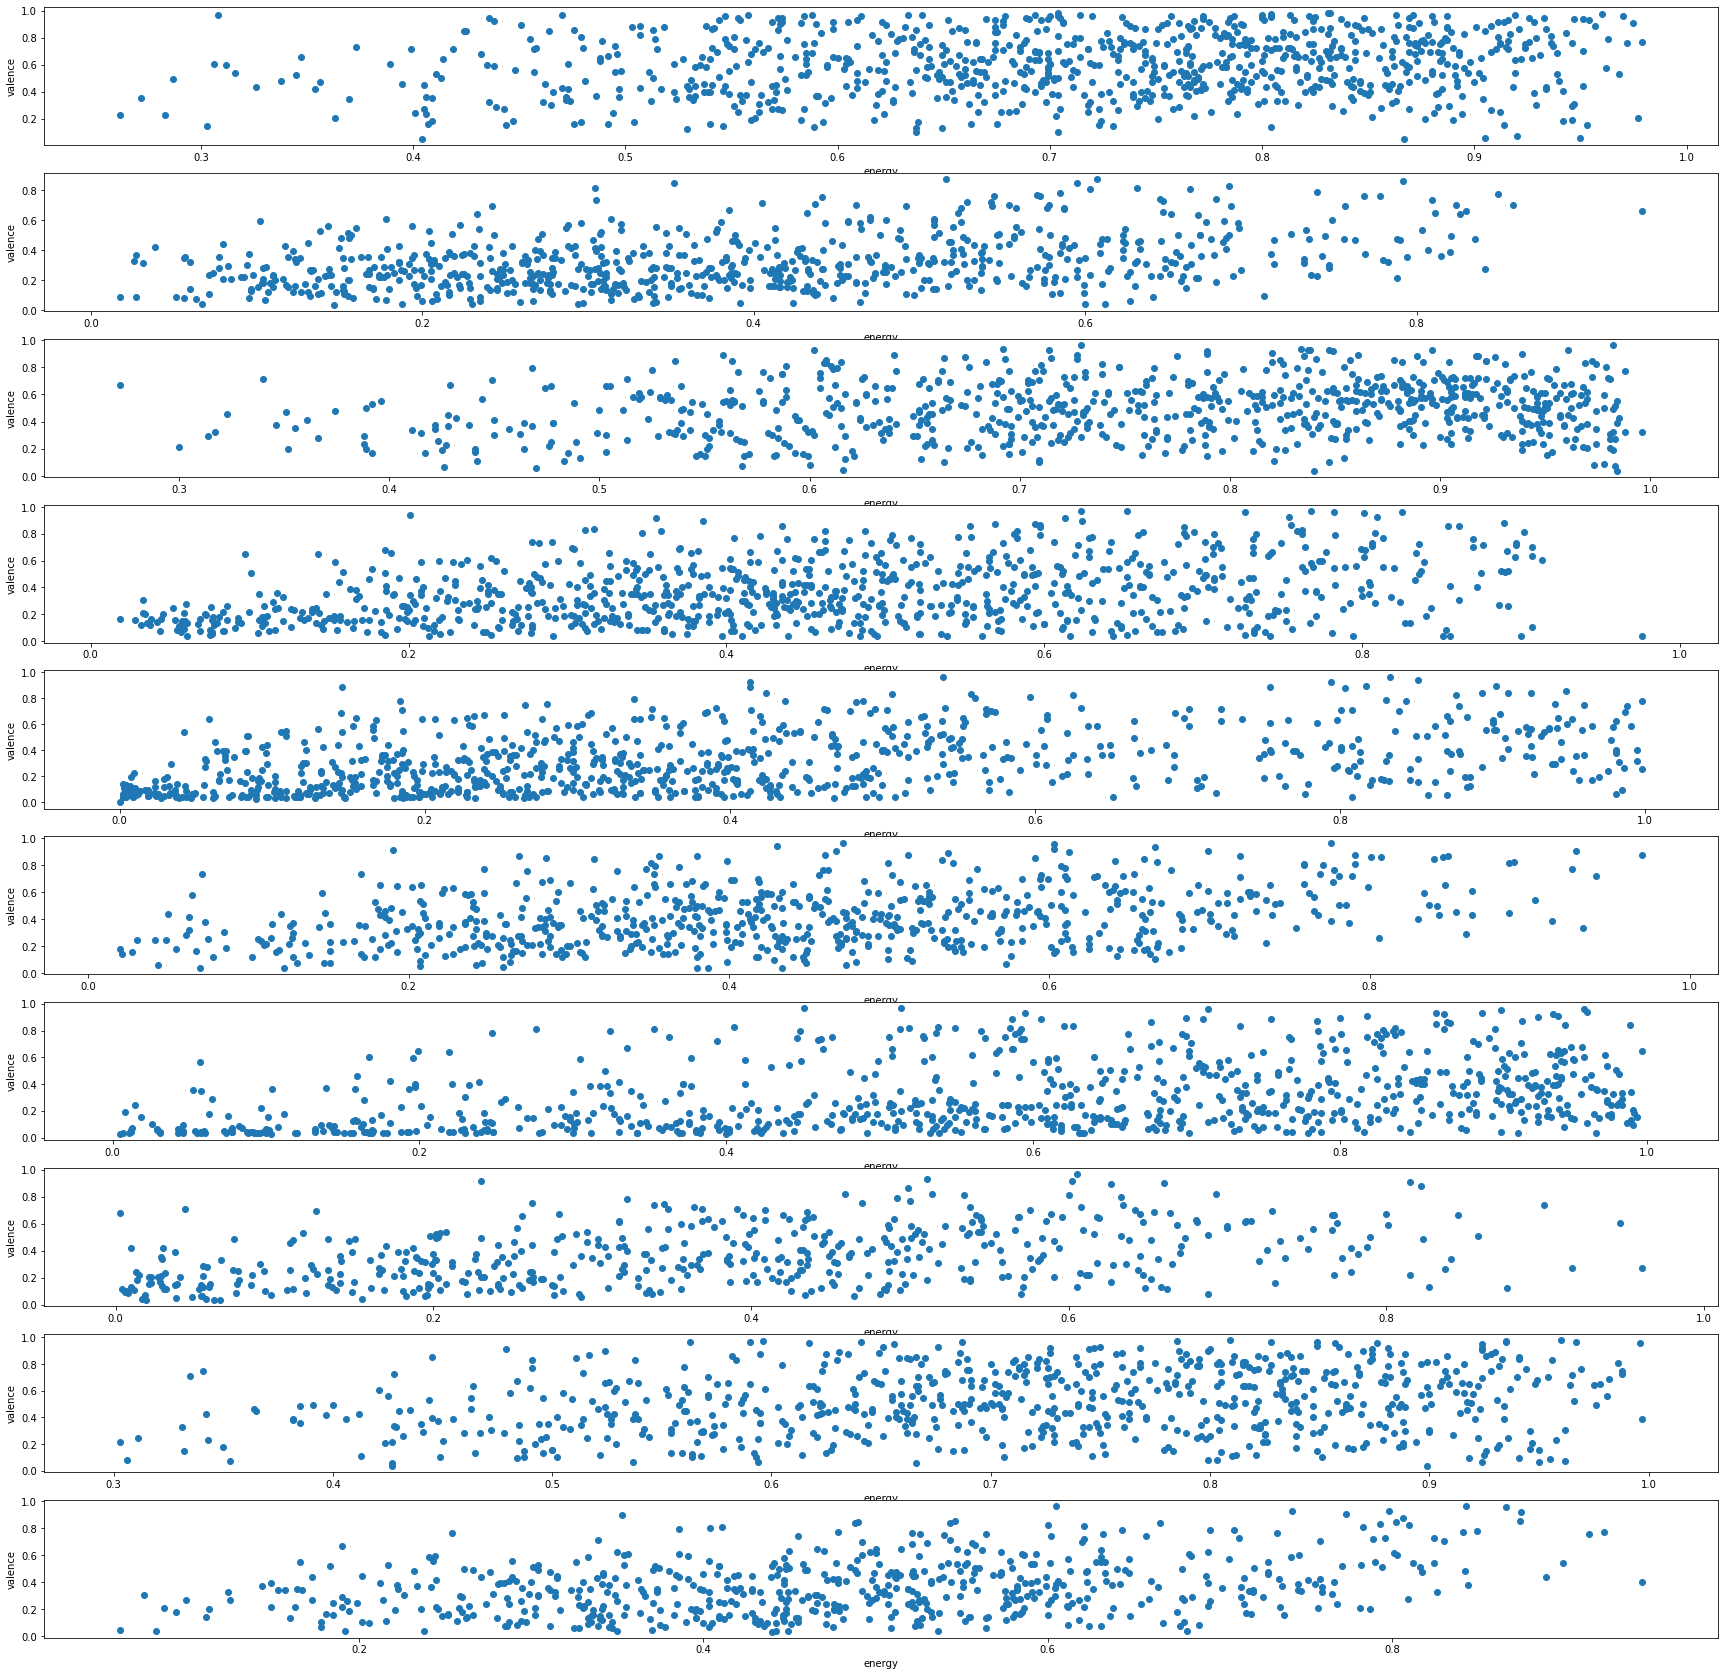

In [13]:
plt.figure(1, figsize=(30,30))

draw_scatters(counter, df_to_build_en_val)